# 課題 ボストン住宅価格 線形回帰

## 1. 線形回帰
### 1.1. 回帰と分類
  回帰とは、関数をデータに当てはめることによって、ある変数yの変動を別の変数xの変動により説明・予測・影響関係を検討すことである。例えば、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰である。
　分類は、回帰とは違い具体的な数字を出すのではなく、与えられたクラスに分ける（ラベリングする）ことを目的としている。例えば、花弁の数をみて、少ないとパンジー、多いとたんぽぽのように、あらかじめ与えられたクラス（ここでは、パンジーとたんぽぽ）に分けることを分類という。

 ### 1.2. 線形とは
 　「線形」というのは、「目的変数」と「説明変数」の関係性が線形であるということを意味している。言い換えると、目的変数は次のように表せるという仮定を置いている。言葉にすれば次のようになる。
$$目的変数=切片+説明変数_1×回帰係数_1+...+説明変数_p×回帰係数_p+観測誤差$$
数式では
$$ Y=β_0+X_1β_1+⋯+X_pβ_p+ε $$
上式よりわかるように「線形回帰」の「線形」の意味は「目的変数」と「説明変数」の関数性の間に「非線形な関数」が紛れ込んでいないことを意味している。例えば、指数関数や対数などの関係性が入ると、途端に仮定かが崩れて「線形回帰」を使うことはできません。

### 1.3 単回帰と重回帰
単回帰とは説明変数$x$が一つだけの回帰式のことである。
$$y=ax+b$$
説明変数$x$が二つ以上ある回帰式のことを重回帰といいう。
$$y=β_0 + β_1 x_1 + β_2 x_2$$

# 2. ボストン住宅価格 線形回帰
## 必要なライブラリーをインポート

In [1]:
import numpy as np # 線形代数ライブラリー
import matplotlib.pyplot as plt # 描画ライブラリー
import seaborn as sns # 描画ライブラリー
from sklearn.datasets import load_boston # ボストン住宅価格データ
from scipy.stats import zscore # zスコアライブラリー
import pandas as pd # データ操作ライブラリー
from sklearn.linear_model import LinearRegression # 線形回帰モデル
from sklearn.preprocessing import PolynomialFeatures # 多項式モデル
from sklearn.model_selection import train_test_split # テストデータの分割
from sklearn.metrics import mean_squared_error # 平均二乗誤差回帰損失

### ボストン住宅価格データライブラリーからデータ取得

In [2]:
# ボストン住宅価格データを読み込み
Instance_BostonData = load_boston() # インスタンスを生成

# 変数にデータをPandas型に変換し、格納 
Data = pd.DataFrame(Instance_BostonData.data,columns=Instance_BostonData.feature_names) # 説明変数データ
HousePrices = pd.DataFrame(Instance_BostonData.target, columns={"HousePrices"}) # 目的変数データ (住宅価格)

# 説明変数データの先頭5行表示
print(Data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [3]:
# データから今回の対象となる目的変数「LSTAT」を抽出
DataLstat = Data["LSTAT"] # LSTAT：給与

# 先頭の5行を表示
print("-- Data Lstat --")
print(DataLstat.head()) # 説明変数となるData_Lstat(給与)
print("-----------------------------")
print("-- House prices --")
print(HousePrices.head()) # 目的変数となるHousePrices(住宅価格)

-- Data Lstat --
0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64
-----------------------------
-- House prices --
   HousePrices
0         24.0
1         21.6
2         34.7
3         33.4
4         36.2


### テストデータの分割

In [4]:
# トレーニング80% テスト20%　に分割
(DataLstat_train, DataLstat_test, 
 HousePrices_train, HousePrices_test) = train_test_split(DataLstat, HousePrices, test_size=0.2, random_state=0) # テスト 20% 分割はランダム無し

# 各データのサイズ確認
print("DataLstat:TrainSize{}, TestSize:{}".format(DataLstat_train.shape, DataLstat_test.shape))
print("HousePrices:TrainSize{}, TestSize:{}".format(HousePrices_train.shape, HousePrices_test.shape))

DataLstat:TrainSize(404,), TestSize:(102,)
HousePrices:TrainSize(404, 1), TestSize:(102, 1)


### 線形回帰モデル

In [5]:
# 線形回帰モデル
lin_1d = LinearRegression() # 線形モデルインスタンスの生成

# 線形回帰によるモデル生成
lin_1d.fit(DataLstat_train[:,None], HousePrices_train) # DataLstat_trainをベクトルから行列に変換

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# 線形モデル決定係数
score_1d = lin_1d.score(DataLstat_test[:,None], HousePrices_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


### 3. 決定係数
決定係数とは、回帰分析によって求められた目的変数の予測値が、実際の目的変数の値とどのくらい一致しているかを表している指標である。
回帰分析には、$y=ax+b$という式で表すことができる単回帰分析と、説明変数が複数ある重回帰分析がある。
#### 3.1 単回帰分析における決定係数
単回帰分析では$y=ax+b$の形で目的変数（y）の値を予測するが、あくまで「予測値」のため実際の目的変数の値とは完全に一致しない。そのため、何を説明変数（x）とするかによって、「予測がほぼ当たっている」場合と「あまり当たっていない」場合がある。決定係数は0から1の範囲内の値を取り、1に近ければ近いほど予測が当たっている状態で、0に近ければ近いほど予測があまり当たっていない状態を表す。表現を変えると、1に近いほど、説明変数が目的変数をよく説明していると言える。

#### 3.2 決定係数の計算方法
決定係数は一般的に$R^2$で示され、以下の式で求める。
$$R^2 = \frac{目的変数の予測値の偏差平方}{目的変数の観測値の偏差平方和}$$
また、目的変数の観測値の偏差平方和は全平方和、目的変数の予測値の偏差平方は回帰平方和と言い、観測値を$y$、予測値$\hat{y}$、平均値$\bar{y}$とすると以下の式で求めることができる。
$$全平方和=\sum_{i=1}^n (y_{i}-\bar{y})^2 \tag{1} $$
$$回帰平方和=\sum_{i=1}^n (\hat{y}_{i}-\bar{y})^2 \tag{2}$$
上式の$(1),(2)$を合わせると以下の式になる。
$$R^2 = \frac{ \sum_{i=1}^n (\hat{y}_{i}-\bar{y})^2 }{\sum_{i=1}^n (y_{i}-\bar{y})^2}$$

### 3.2 決定係数が高いモデル
「日本の国民全体からランダムに1000人選んでアンケートを行う」ことを考えてみる。
このアンケートの結果にもとづいて回帰分析を行い、そこで得られた回帰係数をもとに決定係数を出したとする。しかしながら、ここで求められた回帰係数はあくまで「たまたま選ばれた1000人」に対して最も予測が当たるように求められたものである。日本の国民全員を対象に「たまたま選ばれた1000人」に最適化された結果を適用すると、一般に予測が悪くなるはずである。
決定係数は「たまたま選ばれた1000人」への予測の当てはまりだけを見ている指標である。そのためこれを「日本の国民全体を対象」とした決定係数と考えようとすると、予測の当てはまりの良さを課題に見積もっていることになり不適切である。
こうした問題に対処し、あくまで「日本の国民全体を対象」とした予測値の当てはまりを評価できるよう決定係数の値を修正したものが「自由度調整済み決定係数」である。値の修正にはサンプル数と説明変数の個数から求められる「自由度」という数字を使っているため、この名前がつけられている。

## 4. 2,3,4次式の回帰
### 4.1 モデル生成

In [7]:
# 回帰モデルのインスタンス読込み
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

# 2,3,4次の多項式生成
degree_2 = PolynomialFeatures(2)
degree_3 = PolynomialFeatures(3)
degree_4 = PolynomialFeatures(4)

# データを2,3,4次に合うように変換 
x_train_2 = degree_2.fit_transform(DataLstat_train[:,None])
x_train_3 = degree_3.fit_transform(DataLstat_train[:,None])
x_train_4 = degree_4.fit_transform(DataLstat_train[:,None])

# 予測モデル生成
lin_2d.fit(x_train_2, HousePrices_train)
lin_3d.fit(x_train_3, HousePrices_train)
lin_4d.fit(x_train_4, HousePrices_train)

# 予測モデルをテスト
x_test_2 = degree_2.fit_transform(DataLstat_test[:,None])
x_test_3 = degree_3.fit_transform(DataLstat_test[:,None])
x_test_4 = degree_4.fit_transform(DataLstat_test[:,None])

# 決定係数算出
score_2d = lin_2d.score(x_test_2, HousePrices_test)
score_3d = lin_3d.score(x_test_3, HousePrices_test)
score_4d = lin_4d.score(x_test_4, HousePrices_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_2d)
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_3d)
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_4d)

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


### 4.2 回帰モデルと次数
モデルの次数を上げると数式は次数に応じて説明変数が増える。以下に1〜4次までの数式を示す。

$1次式：y=ax+b$

$2次式：y=ax^2 + bx^2 + c$

$3次式：y=ax^3 + bx^2 + cx + d$

$4次式：y=ax^4 + bx^3 + cx^2 + dx +e$

次数を増やすとパラメータが次数に応じ増え、モデルの柔軟性が上がり表現力が高くなる。しかし、表現力が高すぎると本来なら学習しなくてよりノイズデータを無理に学習してしまうため、ノイズを含んだ予測になってしまう。

## 5. 重回帰
### 5.1 重回帰モデル

In [8]:
# 目的変数と各説明変数の相関を求める
Data_join = pd.concat([HousePrices, Data],axis=1)
Data_join.corr()["HousePrices"].abs().sort_values(ascending=False)

HousePrices    1.000000
LSTAT          0.737663
RM             0.695360
PTRATIO        0.507787
INDUS          0.483725
TAX            0.468536
NOX            0.427321
CRIM           0.388305
RAD            0.381626
AGE            0.376955
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
Name: HousePrices, dtype: float64

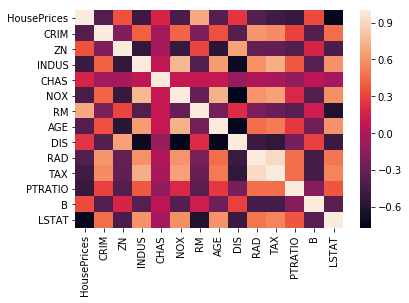

In [9]:
sns.heatmap(Data_join.corr())

In [10]:
# トレーニング80% テスト20%　に分割
(DataLstat_train, DataLstat_test, 
 HousePrices_train, HousePrices_test) = train_test_split(DataLstat, HousePrices, test_size=0.2, random_state=0) # テスト 20% 分割はランダム無し
x_train, x_test, y_train, y_test = train_test_split(Data, HousePrices, test_size=0.2, random_state=0)

# x_train_multi = x_train.loc[:,["LSTAT","PTRATIO", "INDUS"]]
# x_test_multi = x_test.loc[:,["LSTAT","PTRATIO", "INDUS"]]

x_train_multi = x_train.loc[:,["LSTAT","RM", "DIS", "ZN"]]
x_test_multi = x_test.loc[:,["LSTAT","RM", "DIS", "ZN"]]

degree_2 = PolynomialFeatures(2)
x_tarin = degree_2.fit_transform(x_train_multi)
x_test = degree_2.fit_transform(x_test_multi)

lin_multi = LinearRegression()
lin_multi.fit(x_tarin, y_train)

# 線形モデル決定係数
score_multi = lin_multi.score(x_test, y_test)
print("多重回帰における住宅価格への決定係数は%.2f"%(score_multi))

多重回帰における住宅価格への決定係数は0.71


### 5.1 多重回帰の性質
多重回帰は説明変数を増やすことにより、複数の要素による目的変数の影響を説明することが可能になる。しかし、説明変数を増やすとどの説明変数が最も影響してるのかがわかり難くなるだけでなく、説明変数同士に相関関係があると互いに影響を与えてしまうことがある。この現象を多重共線性といいう。